# **Linear Regression with L1, L2 , ElasticNet Regularization and Cross validation**

In [ ]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error # (r2_Score = 1 means perfect fit)

In [ ]:
X, y = fetch_california_housing(return_X_y=True)

# This makes all the feature values have a mean of 0 and a standard deviation of 1
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 50 alphas from 0.0001 to 10000 on a logarithmic scale
alphas = np.logspace(-4, 4, 50)

# Dictionary for easy model access
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": RidgeCV(alphas=alphas, store_cv_values=True),
    "Lasso": LassoCV(alphas=alphas, cv=5), # 5 fold cross validation
    "ElasticNet": ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5)
}

In [25]:
results = {}

# Training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results[name] = {
        "model": model,
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred)
    }

    print(f"{name}:")
    if hasattr(model, 'alpha_'):
        print(f"  Best alpha: {model.alpha_:.5f}")
    print(f"  Train R2: {results[name]['train_r2']:.3f}")
    print(f"  Test R2:  {results[name]['test_r2']:.3f}")
    print("-" * 30)

Linear Regression:
  Train R2: 0.613
  Test R2:  0.576
------------------------------
Ridge:
  Best alpha: 2.55955
  Train R2: 0.613
  Test R2:  0.576
------------------------------
Lasso:
  Best alpha: 0.00066
  Train R2: 0.613
  Test R2:  0.577
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


ElasticNet:
  Best alpha: 0.00045
  Train R2: 0.613
  Test R2:  0.576
------------------------------


**Validation Curves**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


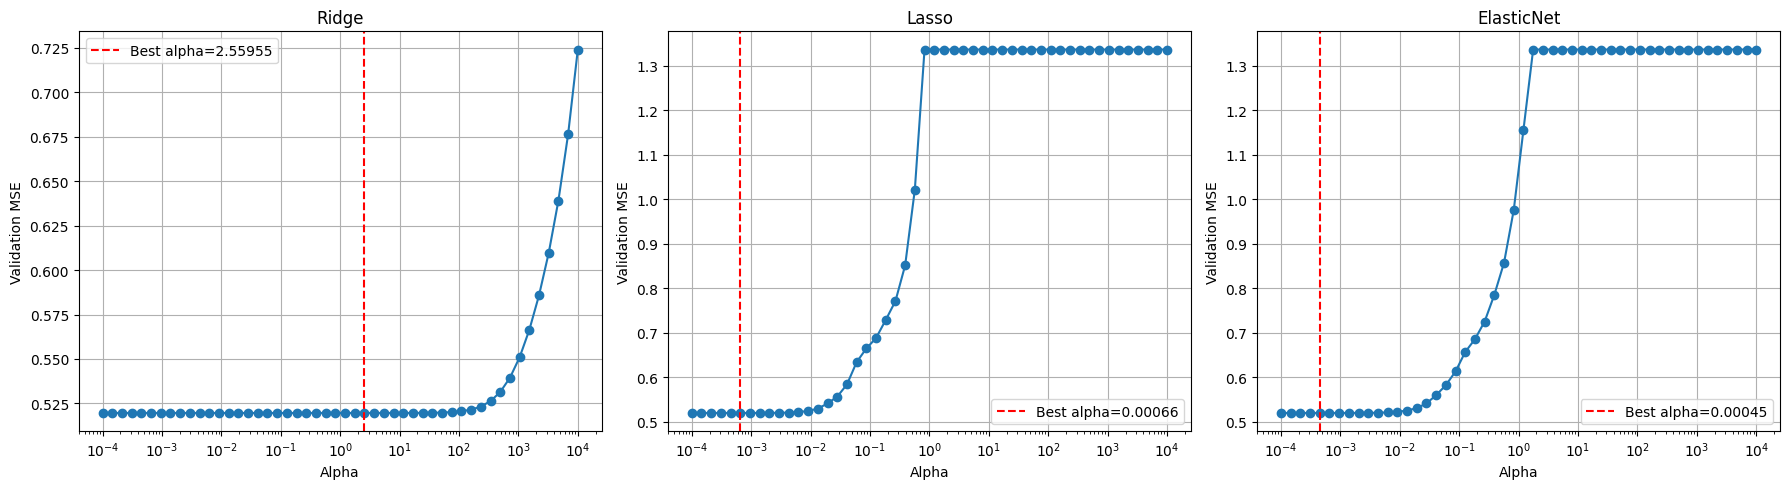

In [ ]:
plt.figure(figsize=(18, 5))

# Initialize a counter to track which subplot we're on
plot_idx = 1

# Loop through each model result
for name, res in results.items():
    # Skip Linear Regression because it doesn't have a regularization parameter alpha
    if name == "Linear Regression":
        continue

    # Create a subplot for each model (total 3 models: Ridge, Lasso, ElasticNet)
    plt.subplot(1, 3, plot_idx)
    
    # Get the trained model object
    model = res["model"]

    # Special case for Ridge, since it stores cv_values_ differently
    if name == "Ridge":
        mse = np.mean(model.cv_values_, axis=0)  # Take mean MSE across folds for each alpha
        plt.plot(alphas, mse, marker='o')  # Plot MSE vs alpha
    else:
        mse = model.mse_path_.mean(axis=1)  # For Lasso and ElasticNet, mse_path_ holds MSEs
        plt.plot(model.alphas_, mse, marker='o')  # Plot MSE vs alpha

    # Highlight the best alpha with a vertical red dashed line
    plt.axvline(model.alpha_, color='r', linestyle='--', label=f"Best alpha={model.alpha_:.5f}")
    
    # Set x-axis to logarithmic scale because alphas are log-spaced
    plt.xscale('log')
    plt.xlabel("Alpha")  # Label for x-axis
    plt.ylabel("Validation MSE")  # Label for y-axis
    plt.title(name)  # Title of the subplot (model name)
    plt.grid(True)  # Add grid for better readability
    plt.legend()  # Show legend (to label the best alpha)

    # Move to next subplot position
    plot_idx += 1

# Adjust spacing between subplots to make them look neat
plt.tight_layout()

# Show all the plots
plt.show()

**Regression Lines**

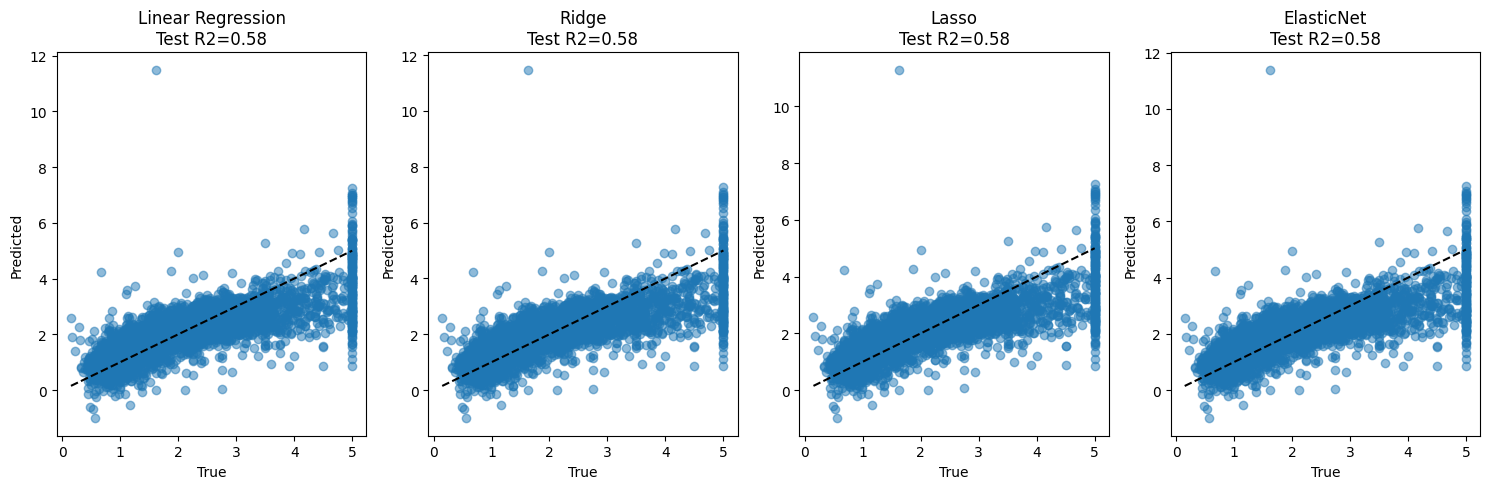

In [ ]:
# Set the figure size for the entire plot (width=15 inches, height=5 inches)
plt.figure(figsize=(15, 5))

# Loop over each model's result, along with an index for subplot positioning
for i, (name, res) in enumerate(results.items()):
    # Create a subplot for each model (1 row, 4 columns, at position i+1)
    plt.subplot(1, 4, i+1)
    
    # Predict the target variable using the trained model on the test set
    y_pred = res["model"].predict(X_test)
    
    # Scatter plot of true vs predicted values
    plt.scatter(y_test, y_pred, alpha=0.5)  # alpha=0.5 makes points semi-transparent for better visibility
    
    # Plot a dashed reference line (y = x) to visualize perfect prediction
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    
    # Label the axes
    plt.xlabel("True")
    plt.ylabel("Predicted")
    
    # Set the title with the model name and its Test R² score
    plt.title(f"{name}\nTest R2={res['test_r2']:.2f}")

# Automatically adjust subplot spacing to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()
